In [1]:
import os
import sys
import numpy as np

import py3Dmol
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

Added the HTML style to align the protein structure and the Rosetta Energy color bar.

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

Function to read the Rosetta output pdbfile to extract the per residue energy values.

In [3]:
def read_PDB_Rosetta(pdbfilename, split_string="pose"):
    
    with open (pdbfilename, "r") as pdbfile:
        
        score = False
        
        score_list = []
        
        for line in pdbfile:
            
            if line.split(" ")[0] == split_string:
                
                score = True
                
            if score == True:
                
                score_list += [str(line)]
                
    with open ("{0}.bfactor".format(pdbfilename.split('.')[0]), "w") as bfactor_score:
        
        for line in score_list[1:-2]:
            
                bfactor_score.write((line.split(" ")[0]).split("_")[-1] +" "+line.split(" ")[-1])    
                
    with open ("{0}.score".format(pdbfilename.split('.')[0]), "w") as scorefile:
        
        for line in score_list:
            
            scorefile.write(line)


Write the new PDB file with bfactor as Rosetta energy value.

In [4]:
def write_pdb_Rosetta (pdb_filename, bfactor_filename, pdb_output_filename):
    
    with open (pdb_filename, "r") as pdb_file:
        
        pdb_lines = []
        
        for line in pdb_file:
            
            if line[0:6] == "ATOM  ":
                
                pdb_lines += [str(line)]
                
    bfactor_dict = {}
                
    with open (bfactor_filename, "r") as bfactor_file:
        
        for line in bfactor_file:
            
            # print(int(line.split(" ")[0]), float(line.split(" ")[1]))
                
            bfactor_dict[int(line.split(" ")[0])] = float((line.strip()).split(" ")[1])
    
    with open (pdb_output_filename, "w") as pdb_output_file:
    
        for lineno, line in enumerate(pdb_lines):
            
            if lineno == 0:
            
                first_resnr = int(line[23:26])
            
            resnr = int(line[23:26])
            
            bfactor_iter = resnr - first_resnr + 1
        
            pdb_output_file.write("{prefix}{bfac:6.2f}{suffix}".format(prefix=line[:60], bfac=bfactor_dict[bfactor_iter], suffix=line[66:]))
    

In [5]:
read_PDB_Rosetta("rosetta_score.pdb", split_string="pose")

In [6]:
write_pdb_Rosetta ("rosetta_score.pdb", "rosetta_score.bfactor", "rosetta_score_bfactor.pdb")

Plot the protein and color the protein surface with bfactor. The limit of the bfactor in this example is set from -10 to 10. The color bar is plotted first so that it can be plotted alonside the protein structure. 

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

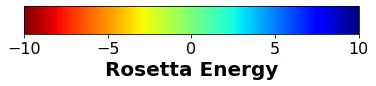

In [7]:
fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = mpl.cm.jet_r
norm = mpl.colors.Normalize(vmin=-10, vmax=10)

cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cmap,norm=norm,orientation='horizontal')
cb1.set_label('Rosetta Energy',fontsize=20,fontweight='bold')
cb1.ax.tick_params(labelsize=16) 

view1 = py3Dmol.view("./rosetta_score_bfactor.pdb", height=600,width=1000)
view1.setStyle({'cartoon': {'color':'white'}})
view1.addSurface(py3Dmol.VDW,{'opacity':0.7,'colorscheme':{'prop':'b','gradient':'roygb','min':-10,'max':10}})